# SVM

Support-vector machines are supervised learning models with associated learning algorithms that analyze data for 
classification and regression analysis

The data is available for download at the following link:
https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view

The detailed information about the data is available at the following link:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [34]:
df=pd.read_csv('C:\\Users\\user\\Downloads\\bill_authentication.csv')

EXPLORATORY DATA ANALYSIS

In [35]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [36]:
df.shape

(1372, 5)

In [37]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

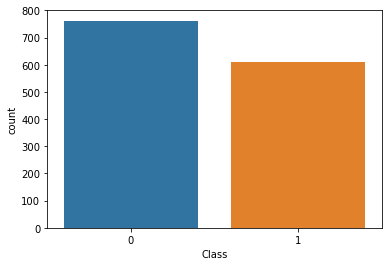

In [38]:
sns.countplot(x='Class',data=df)

In [39]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


DATA PREPROCESSING


In [9]:
X=df.drop('Class',axis=1)
y=df['Class']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=0)

TRAINING THE ALGORITHM

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit
method. Execute the following code to train the algorithm:

In [14]:
from sklearn.svm import SVC
svcclassifier=SVC(kernel='linear')
svcclassifier.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
y_pred=svcclassifier.predict(X_test)

EVALUATING THE ALGORITHM

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[201   5]
 [  0 165]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       206
           1       0.97      1.00      0.99       165

    accuracy                           0.99       371
   macro avg       0.99      0.99      0.99       371
weighted avg       0.99      0.99      0.99       371

